# CNN PROJECT




**This project Convolutional Neural Network (CNN) to classify CIFAR images. Because this project uses the cifer dataset, creating and training your model will take just a few lines of code. and deploy it to Gradio **

#Requirement
tensorflow
numpy
pillow
gradio


# import Tensorflow

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
data = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
(X_train, y_train), (X_test, y_test) = data
X_train, X_test = X_train/255.0, X_test/255.0

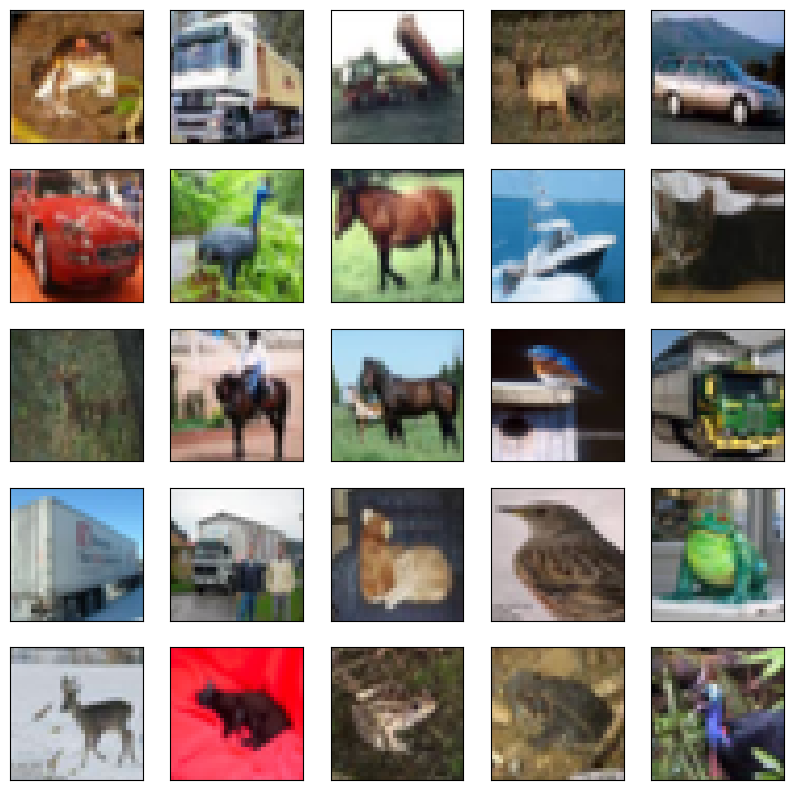

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
# early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [11]:


history = model.fit( X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks = early_stopping)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.3510 - loss: 1.7554 - val_accuracy: 0.5474 - val_loss: 1.2760
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5827 - loss: 1.1824 - val_accuracy: 0.6136 - val_loss: 1.0897
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.6453 - loss: 1.0041 - val_accuracy: 0.6383 - val_loss: 1.0284
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6820 - loss: 0.9048 - val_accuracy: 0.6850 - val_loss: 0.9064
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7111 - loss: 0.8240 - val_accuracy: 0.6880 - val_loss: 0.8940
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7306 - loss: 0.7633 - val_accuracy: 0.6842 - val_loss: 0.9143
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.7435 - loss: 0.7340 - val_accuracy: 0.6731 - val_loss: 0.9462
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.7611 -

313/313 - 4s - 13ms/step - accuracy: 0.7111 - loss: 0.8542


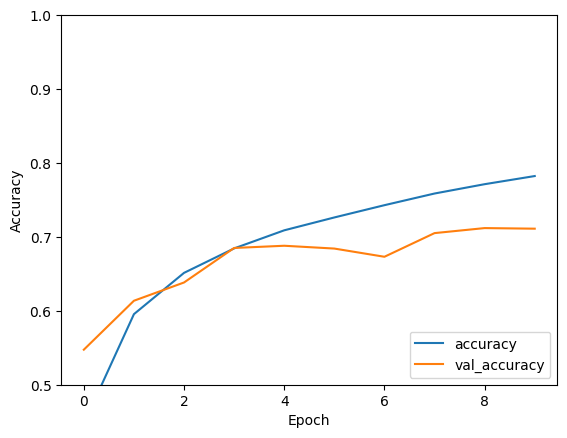

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [13]:
print(test_acc)

0.7110999822616577


In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# If you want train accuracy too
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_acc * 100:.2f}%")

Test Accuracy: 71.11%
Train Accuracy: 81.32%


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train predictions
y_train_pred = model.predict(X_train)
y_train_pred_classes = y_train_pred.argmax(axis=1)




1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step


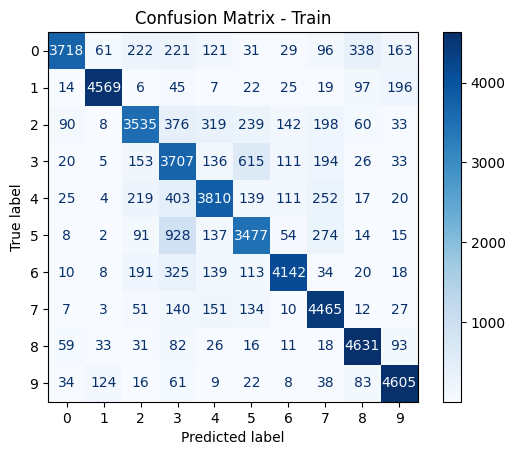

In [18]:
cm_train = confusion_matrix(y_train, y_train_pred_classes)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap="Blues")
plt.title("Confusion Matrix - Train")
plt.show()



In [19]:
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [20]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Load your trained model
model = tf.keras.models.load_model("cifar10_model.h5")
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

def predict_image(img):
    img = img.resize((32,32))
    img_array = np.array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return {class_names[i]: float(prediction[0][i]) for i in range(10)}

demo = gr.Interface(fn=predict_image,
                    inputs=gr.Image(type="pil"),
                    outputs=gr.Label(num_top_classes=3))

demo.launch()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'cifar10_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)